In [2]:
!pip install wikipedia

In [3]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [4]:
import wikipedia

In [5]:
alexnet = models.AlexNet()

In [28]:
resnet = models.resnet101(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Saving bird.jpeg to bird.jpeg


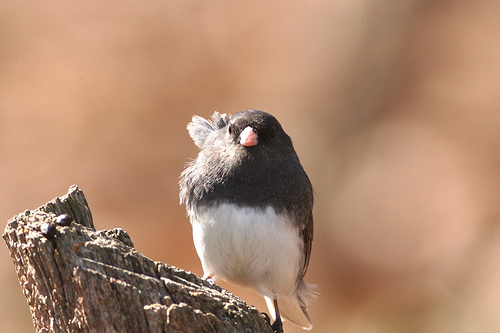

In [30]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("bird.jpeg")
img

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
img_t = preprocess(img)

In [32]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-3.1041e+00,  2.5616e-01,  1.6916e+00,  2.1327e+00, -1.5045e+00,
         -2.3007e+00, -3.0517e-01,  1.7383e+00,  5.7504e+00,  1.8862e+00,
          8.9327e+00,  7.6888e+00,  7.4922e+00,  2.3067e+01,  6.5109e+00,
          6.2386e+00,  9.6474e+00,  9.5988e+00,  9.4285e+00,  1.2294e+01,
          8.5284e+00,  5.0544e+00,  1.0646e+00,  5.3924e+00,  3.4325e+00,
         -1.6862e+00, -1.2215e+00,  9.2211e-01,  3.3751e+00,  3.5435e+00,
         -3.0165e+00, -7.5022e-01, -2.8635e+00, -1.0426e+00,  1.4831e-01,
         -1.3752e+00, -9.0674e-01, -1.3374e+00,  1.6379e+00,  7.0697e-01,
          2.2241e-01,  2.1178e+00,  1.8961e+00,  1.5404e+00,  1.9212e-01,
          1.1609e-01,  6.3966e-01, -1.1938e+00, -1.4063e+00, -4.8134e-01,
         -1.7617e+00, -2.8032e+00,  5.4513e-02, -1.5260e+00,  8.5995e-01,
         -6.0903e-01, -6.3691e-01,  6.7769e-01, -3.1022e+00, -8.9876e-01,
          2.1155e+00, -2.1232e+00, -8.8313e-01, -1.6577e+00, -1.4466e-02,
         -3.1602e+00,  1.2910e+00,  7.

In [33]:
with open('/content/drive/MyDrive/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('13, junco', 99.99669647216797)

In [34]:
st = [x for x in labels[index[0]].split(',')]
print(st[1])
result = wikipedia.summary(st[1], sentences = 10)

print(result)

 junco
Junko is a feminine Japanese given name. It is typically written in kanji, but can be written in hiragana (じゅんこ) or katakana  (ジュンコ).
Junko can be written using  kanji including:

純子, "pure, child"
順子, "order, child"
淳子, "pure, child"
潤子, "rich/favor/wet, child"
準子, "conform, child"
洵子, "truth, child"


== People ==
Junko (manga artist) (ぢゅん子), Japanese manga artist
Junko Abe (阿部純子, born 1993), Japanese actress
Junko Akimoto (秋元 順子, born 1947), Japanese singer
Junko Chodos (born 1939), Japanese-American contemporary artist
Junko Furuta (古田 順子, 1971–1989), Japanese torture and murder victim
Junko Hiramatsu (平松 純子, born 1942), Japanese former competitive figure skater
Junko Hirose (広瀬 順子, born 1990), Japanese Paralympic judoka
Junko Hori (堀 絢子, born 1942), Japanese actress and voice actress represented by Production Baobab
Junko Itō, American linguist
Junko Iwao (岩男 潤子, born 1970), Japanese voice actress
Junko Hirotani (広谷 順子, 1956–2020), Japanese singer
Junko Kubo (久保 純子, born 19